In [ ]:
from torchvision.models import resnet18, ResNet18_Weights
model_imagenet = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 134MB/s]


In [9]:
!wget http://places2.csail.mit.edu/models_places365/resnet18_places365.pth.tar

--2025-07-23 13:54:29--  http://places2.csail.mit.edu/models_places365/resnet18_places365.pth.tar
Resolving places2.csail.mit.edu (places2.csail.mit.edu)... 128.52.132.120
Connecting to places2.csail.mit.edu (places2.csail.mit.edu)|128.52.132.120|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45506139 (43M) [application/x-tar]
Saving to: ‘resnet18_places365.pth.tar’

resnet18_places365. 100%[===================>]  43.40M  23.0MB/s    in 1.9s    

2025-07-23 13:54:31 (23.0 MB/s) - ‘resnet18_places365.pth.tar’ saved [45506139/45506139]



In [1]:
!git clone https://github.com/Trustworthy-ML-Lab/CLIP-dissect.git

Cloning into 'CLIP-dissect'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 104 (delta 12), reused 14 (delta 8), pack-reused 80 (from 1)
Receiving objects: 100% (104/104), 15.94 MiB | 16.63 MiB/s, done.
Resolving deltas: 100% (33/33), done.


In [2]:
!unzip custom_tiny_imagenet.zip


Archive:  custom_tiny_imagenet.zip
   creating: custom_tiny_imagenet/
   creating: custom_tiny_imagenet/n01443537/
  inflating: custom_tiny_imagenet/n01443537/n01443537_109.JPEG  
  inflating: custom_tiny_imagenet/n01443537/n01443537_145.JPEG  
  inflating: custom_tiny_imagenet/n01443537/n01443537_15.JPEG  
  inflating: custom_tiny_imagenet/n01443537/n01443537_162.JPEG  
  inflating: custom_tiny_imagenet/n01443537/n01443537_200.JPEG  
  inflating: custom_tiny_imagenet/n01443537/n01443537_210.JPEG  
  inflating: custom_tiny_imagenet/n01443537/n01443537_224.JPEG  
  inflating: custom_tiny_imagenet/n01443537/n01443537_393.JPEG  
  inflating: custom_tiny_imagenet/n01443537/n01443537_438.JPEG  
  inflating: custom_tiny_imagenet/n01443537/n01443537_44.JPEG  
   creating: custom_tiny_imagenet/n01629819/
  inflating: custom_tiny_imagenet/n01629819/n01629819_111.JPEG  
  inflating: custom_tiny_imagenet/n01629819/n01629819_112.JPEG  
  inflating: custom_tiny_imagenet/n01629819/n01629819_138.JPEG

In [4]:
cd ..

/


#Analysis

###This task was completed using a dataset that consisted of one class,from the Imagenet dataset, with ten images. This choice of dataset was made to better understand if the model activations were matching the ground truth concept. In this case the ground truth is the goldfish.

###The Resnet-50 model had the highest number of units that were activated for the concept fish out of the other concepts in the 3k concept set.

###For the models Resnet18 and Resnet18-places the concept that had the highest number of activations was explosions. The concept fish had 87 and 66 activations respectively.

###The number of activations for colors was increasing with the later layers showing more activations for colors in all the three models.

In [10]:
!python /content/CLIP-dissect/describe_neurons.py --d_probe imagenet_val

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
100% 1/1 [00:00<00:00,  1.80it/s]
100% 64/64 [00:00<00:00, 1558.55it/s]
torch.Size([64, 3000])
100% 64/64 [00:00<00:00, 3955.43it/s]
torch.Size([64, 3000])
100% 128/128 [00:00<00:00, 4047.95it/s]
torch.Size([128, 3000])
100% 256/256 [00:00<00:00, 3744.63it/s]
torch.Size([256, 3000])
100% 512/512 [00:00<00:00, 3499.81it/s]
torch.Size([512, 3000])


In [3]:
!pip install ftfy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.2 MB/s eta 0:00:00


#Resnet-50

fish 456


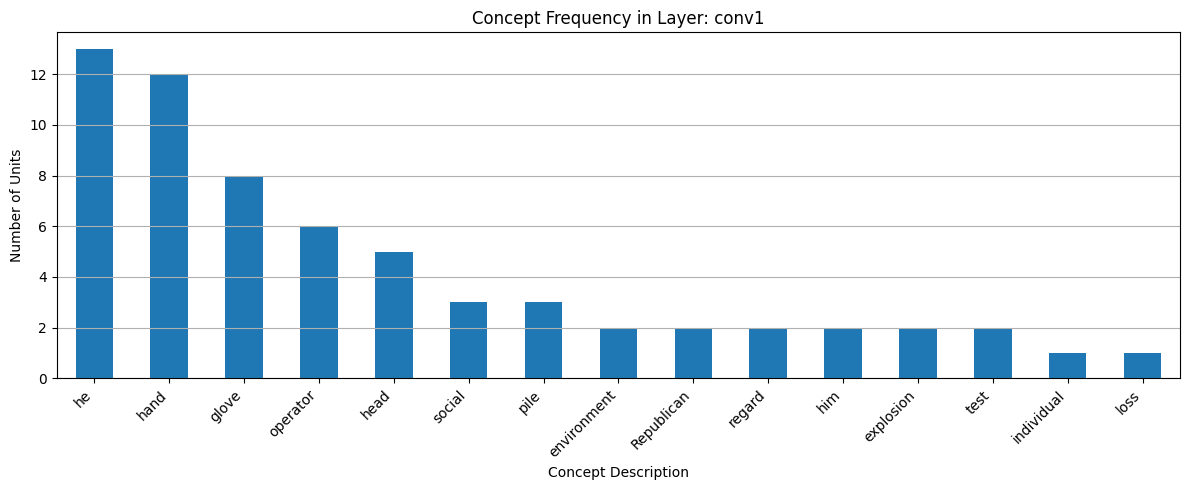

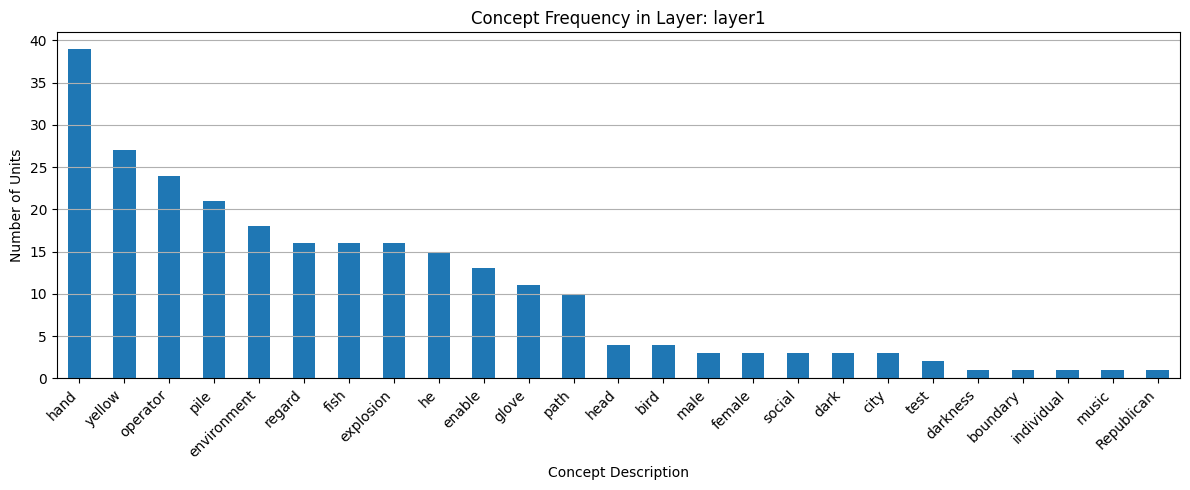

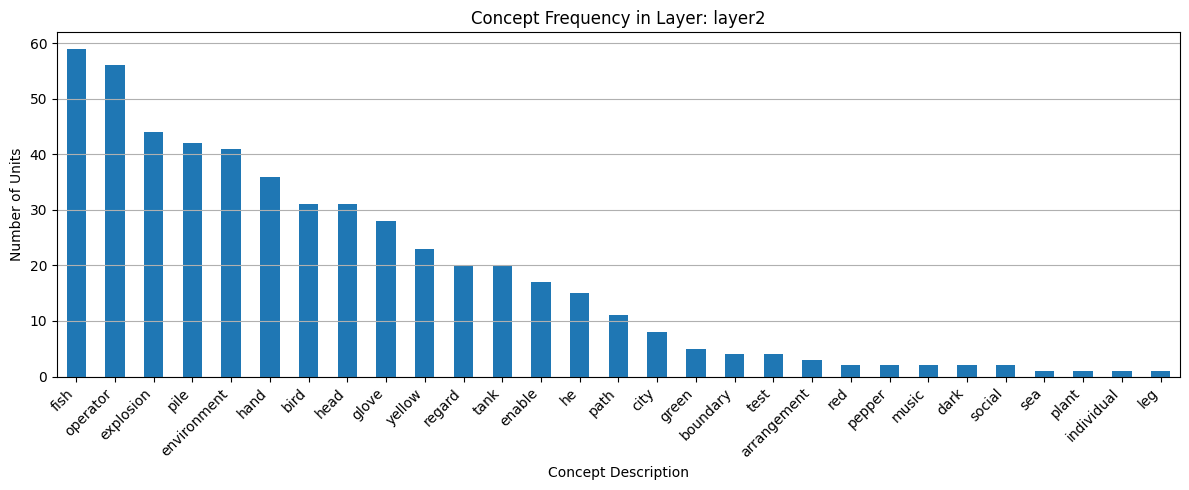

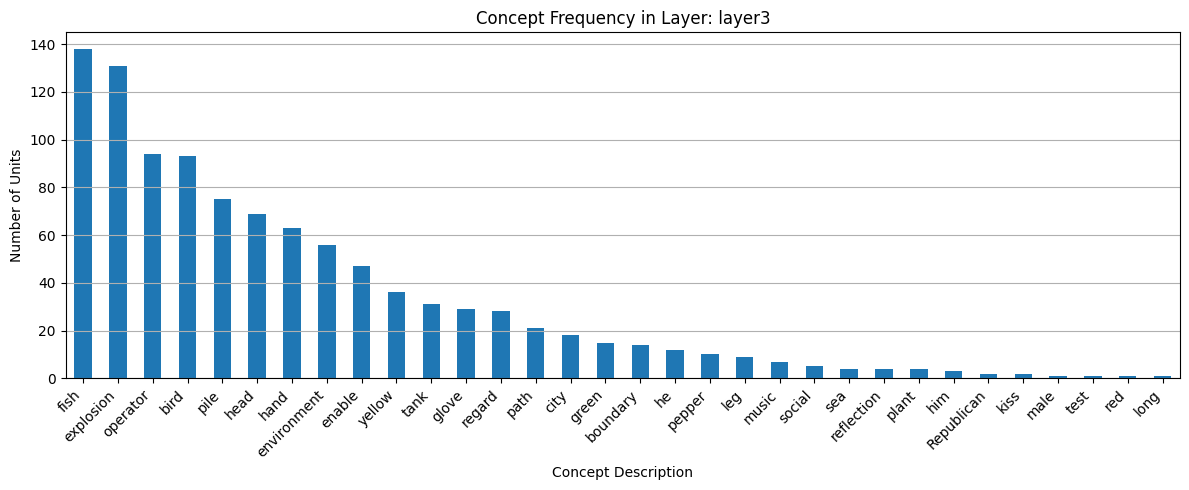

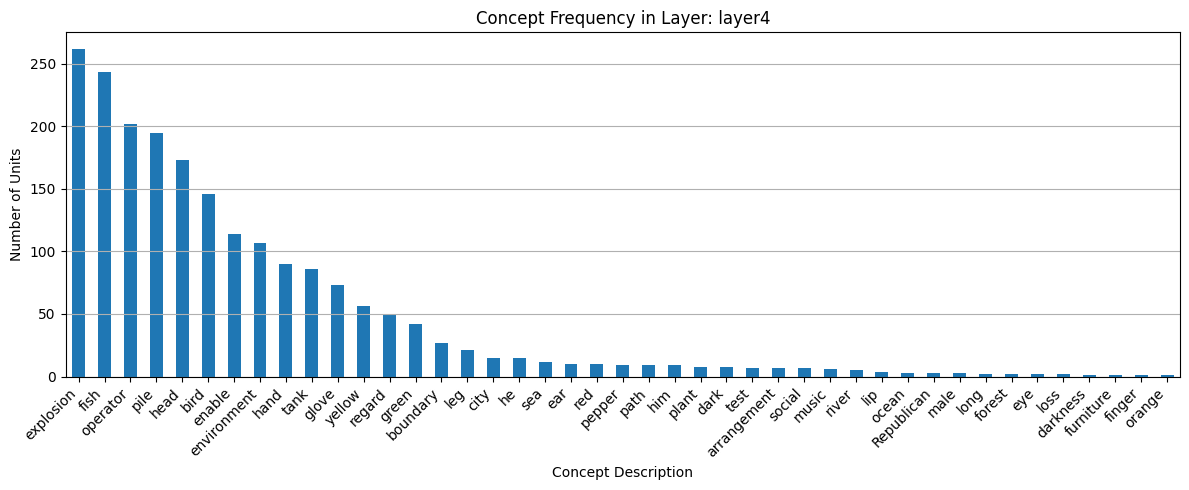

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/results/resnet18_25_07_23_13_50/descriptions.csv")  # Update path if needed

# Get all unique layers
layers = df['layer'].unique()

# Count how often each concept (description) appears across all layers
overall_counts = df['description'].value_counts()

# Get the most learned concept and its count
most_learned_concept = overall_counts.idxmax()
most_learned_count = overall_counts.max()

print(most_learned_concept, most_learned_count)

# For each layer, plot a histogram of description frequencies
for layer in layers:
    # Filter by layer
    layer_df = df[df['layer'] == layer]

    # Count frequencies of each concept
    description_counts = layer_df['description'].value_counts()

    # Skip if empty
    if description_counts.empty:
        continue

    # Plot
    plt.figure(figsize=(12, 5))
    description_counts.plot(kind='bar')
    plt.title(f"Concept Frequency in Layer: {layer}")
    plt.xlabel("Concept Description")
    plt.ylabel("Number of Units")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()


#Resnet-18

Number of concepts being learnt: 44
'fish' was learned by 87 unit(s) across all layers.
explosion 119


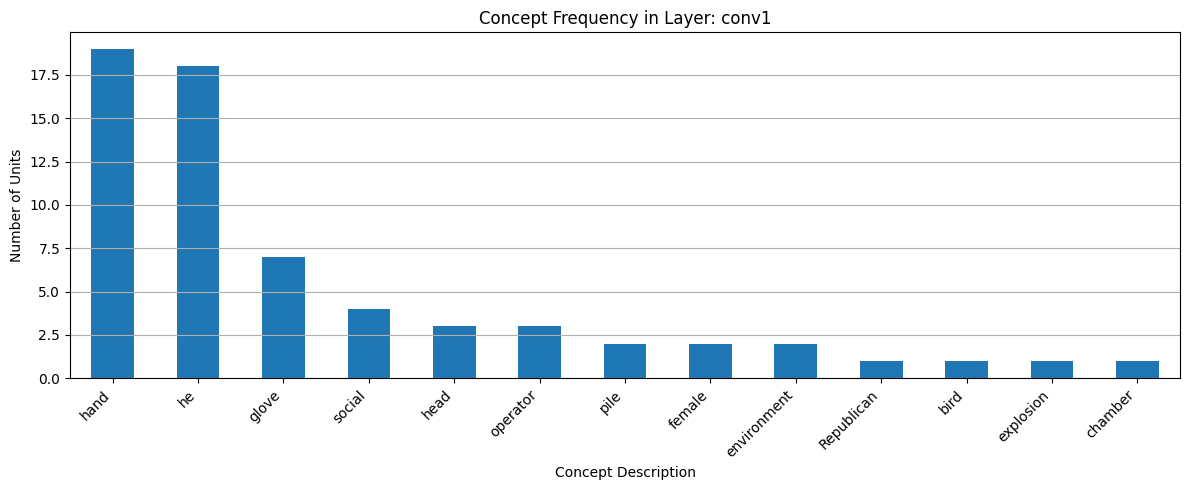

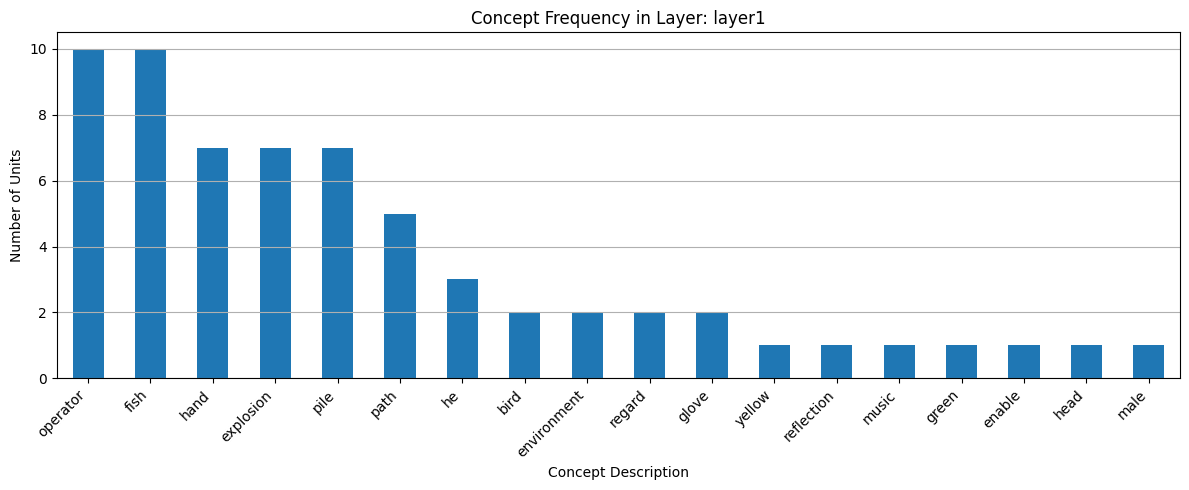

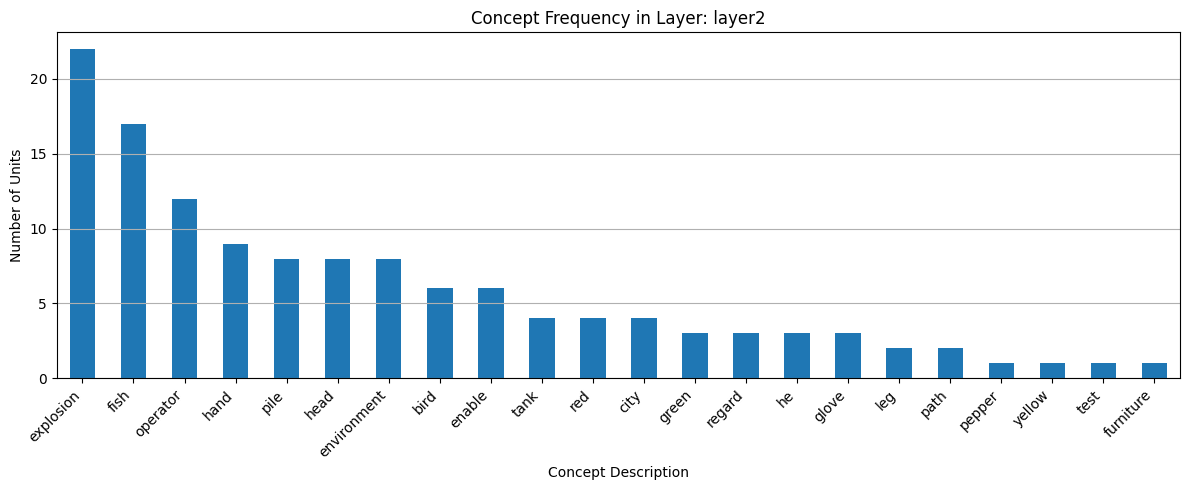

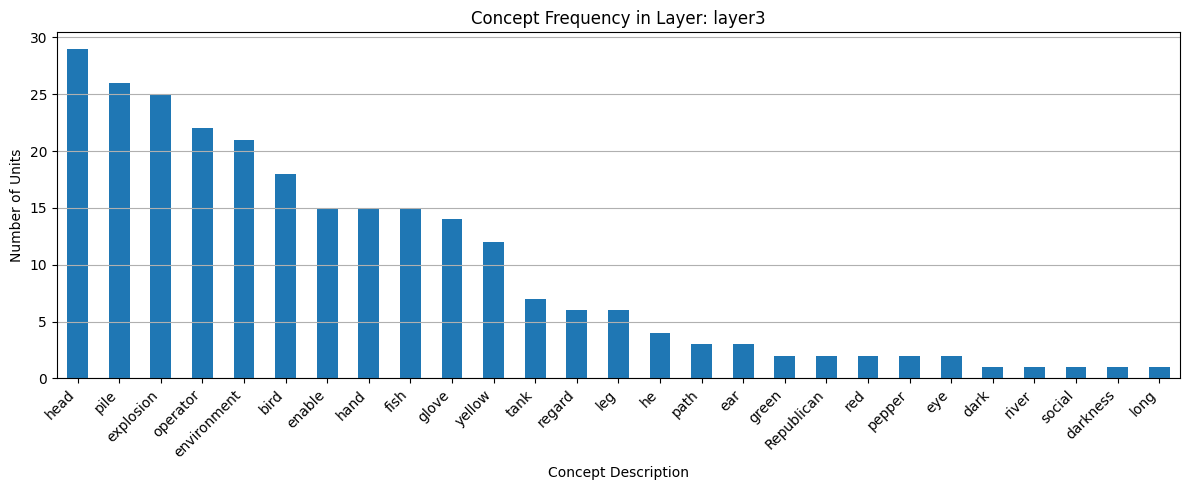

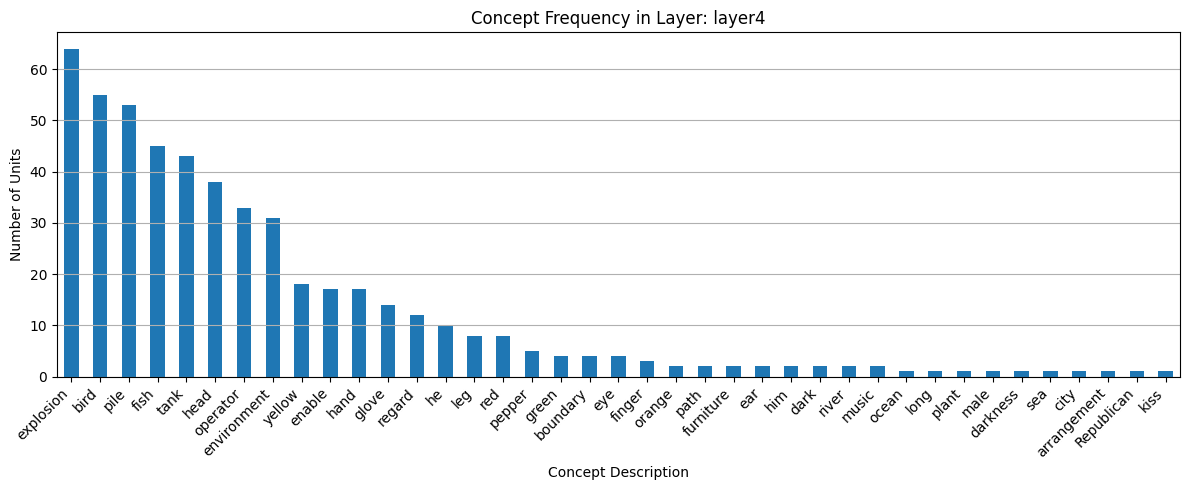

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/results/resnet18_25_07_23_13_50/descriptions.csv")  # Update path if needed

# Get all unique layers
layers = df['layer'].unique()
print("Number of concepts being learnt:", len(df['description'].unique()))

# Count how often each concept (description) appears across all layers
overall_counts = df['description'].value_counts()
fish_count = (df['description'] == 'fish').sum()
print(f"'fish' was learned by {fish_count} unit(s) across all layers.")

# Get the most learned concept and its count
most_learned_concept = overall_counts.idxmax()
most_learned_count = overall_counts.max()

print(most_learned_concept, most_learned_count)

# For each layer, plot a histogram of description frequencies
for layer in layers:
    # Filter by layer
    layer_df = df[df['layer'] == layer]

    # Count frequencies of each concept
    description_counts = layer_df['description'].value_counts()

    # Skip if empty
    if description_counts.empty:
        continue

    # Plot
    plt.figure(figsize=(12, 5))
    description_counts.plot(kind='bar')
    plt.title(f"Concept Frequency in Layer: {layer}")
    plt.xlabel("Concept Description")
    plt.ylabel("Number of Units")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()


#Resnet-18-places

Number of concepts being learnt: 39
'fish' was learned by 66 unit(s) across all layers.
explosion 118


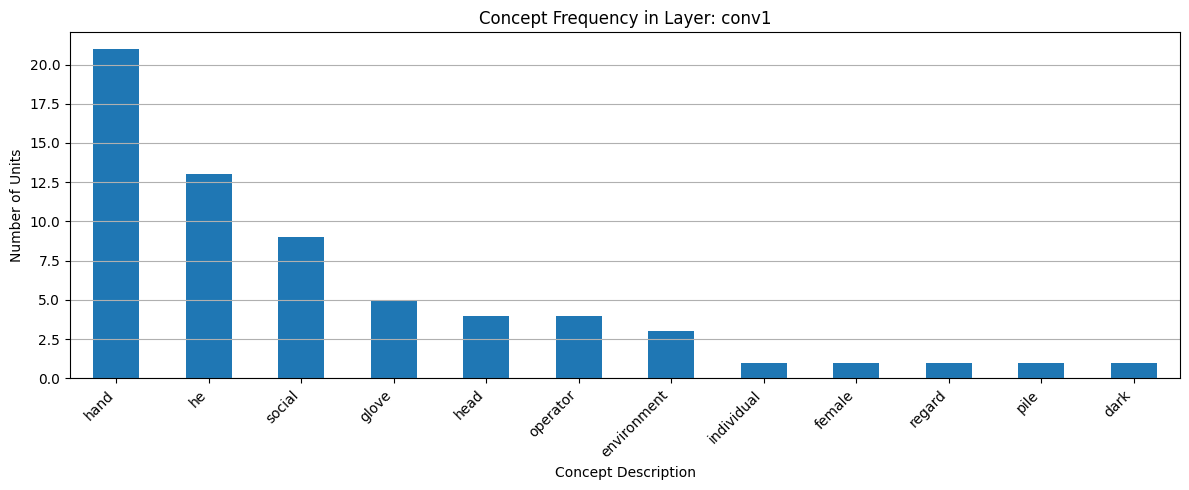

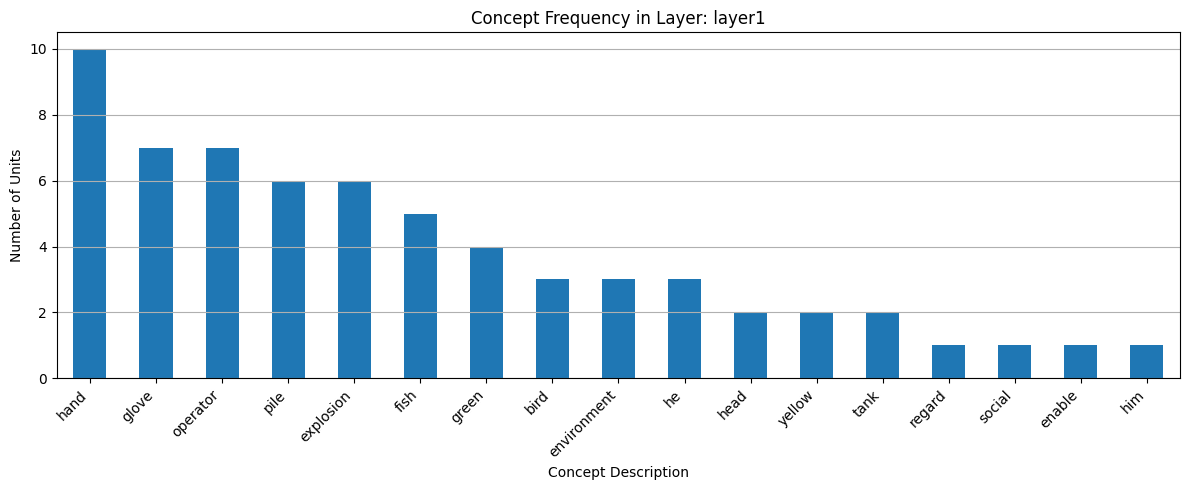

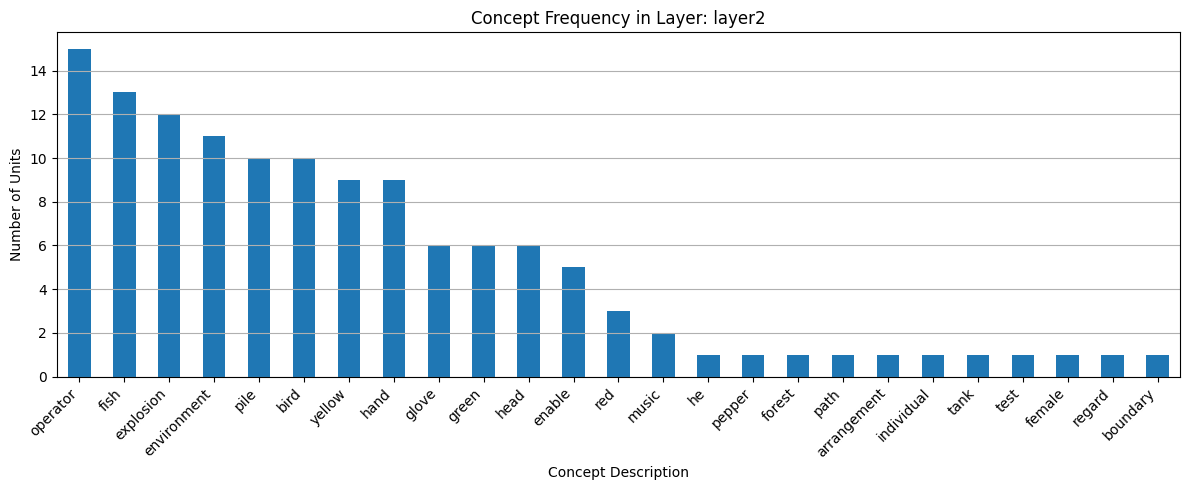

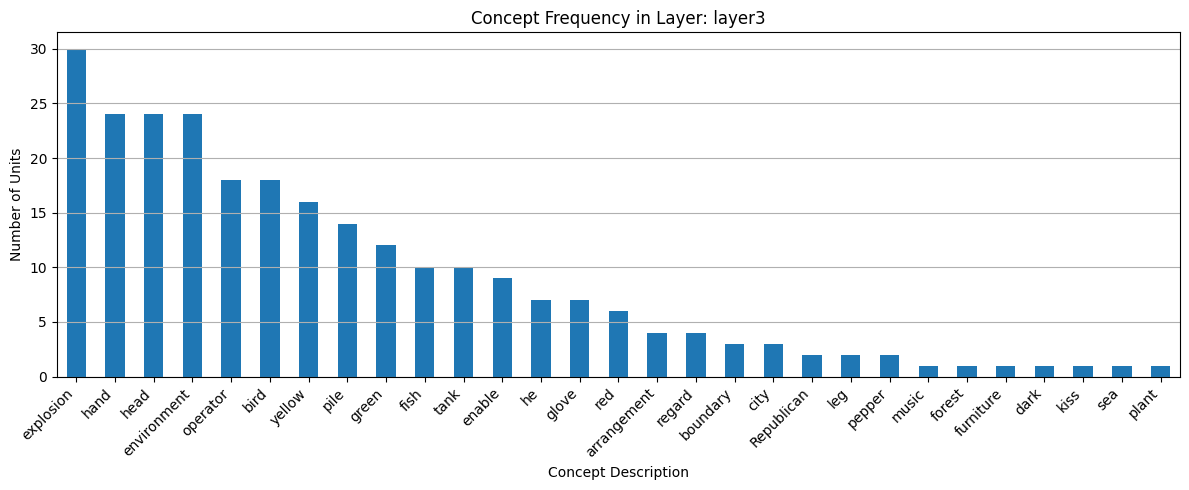

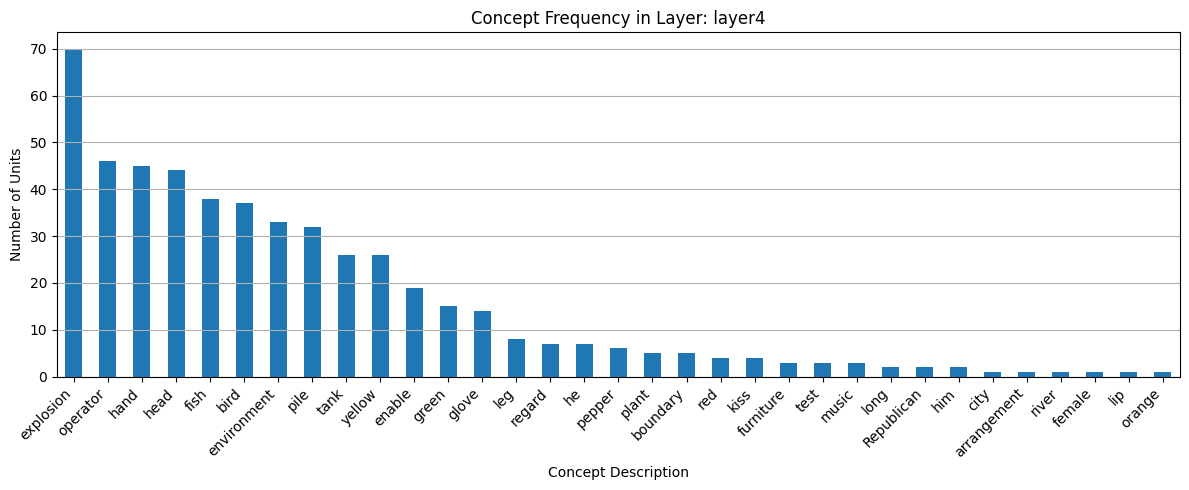

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("/content/results/resnet18_places_25_07_23_13_56/descriptions.csv")  # Update path if needed

# Get all unique layers
layers = df['layer'].unique()
print("Number of concepts being learnt:", len(df['description'].unique()))
# Count how often each concept (description) appears across all layers
overall_counts = df['description'].value_counts()

fish_count = (df['description'] == 'fish').sum()
print(f"'fish' was learned by {fish_count} unit(s) across all layers.")

# Get the most learned concept and its count
most_learned_concept = overall_counts.idxmax()
most_learned_count = overall_counts.max()

print(most_learned_concept, most_learned_count)

# For each layer, plot a histogram of description frequencies
for layer in layers:
    # Filter by layer
    layer_df = df[df['layer'] == layer]

    # Count frequencies of each concept
    description_counts = layer_df['description'].value_counts()

    # Skip if empty
    if description_counts.empty:
        continue

    # Plot
    plt.figure(figsize=(12, 5))
    description_counts.plot(kind='bar')
    plt.title(f"Concept Frequency in Layer: {layer}")
    plt.xlabel("Concept Description")
    plt.ylabel("Number of Units")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()


In [12]:
df.head()

,layer,unit,description,similarity
0,conv1,0,individual,0.056499
1,conv1,1,he,0.034119
2,conv1,2,hand,0.041718
3,conv1,3,environment,0.053051
4,conv1,4,glove,0.044552


In [15]:
print("lol")

lol


In [18]:
!zip -r results.zip results

  adding: results/ (stored 0%)
  adding: results/resnet18_25_07_23_13_50/ (stored 0%)
  adding: results/resnet18_25_07_23_13_50/descriptions.csv (deflated 71%)
  adding: results/resnet18_25_07_23_13_50/args.txt (deflated 43%)
  adding: results/resnet18_places_25_07_23_13_56/ (stored 0%)
  adding: results/resnet18_places_25_07_23_13_56/descriptions.csv (deflated 72%)
  adding: results/resnet18_places_25_07_23_13_56/args.txt (deflated 43%)
  adding: results/resnet50_25_07_23_13_33/ (stored 0%)
  adding: results/resnet50_25_07_23_13_33/descriptions.csv (deflated 73%)
  adding: results/resnet50_25_07_23_13_33/args.txt (deflated 43%)
